In [43]:
import pickle as pkl
import numpy as np

X = pkl.load(open('./data/X_processed.pkl', 'rb'))
y = pkl.load(open('./data/y_processed.pkl', 'rb'))

print(X.shape, y.shape)

((6502, 3, 12), (6502,))


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

training_size = 6000

X_train = X[:training_size]
y_train = y[:training_size]

X_test = X[training_size:]
y_test = y[training_size:]

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

classifier = RandomForestClassifier()
y_pred = classifier.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

0.9322709163346613

(array([ 34, 164, 232, 519, 524]),)


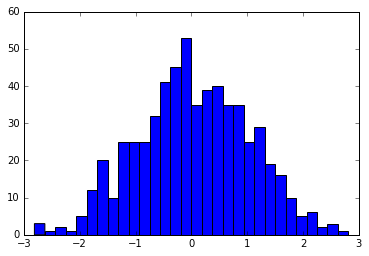

In [45]:
noise = np.random.normal(0, 1, 600)
plt.hist(noise, bins=30)
print(np.where(abs(noise)<0.01))

In [66]:
#directory = './output/2.0_0.001_200_0.002_100/'
#directory = './output/4.0_0.0001_500_0.002_100/'
directory = './output/privatenoaccount/'

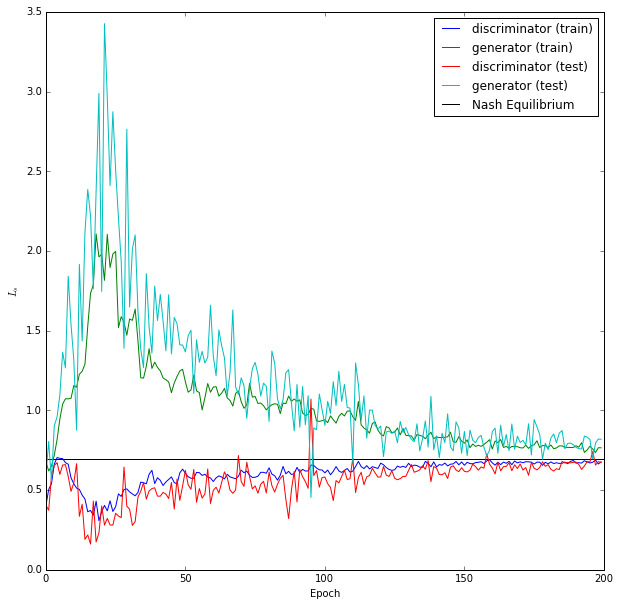

In [67]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.figure(figsize=(10,10))

hist = pkl.load(open(directory + '/acgan-history.pkl', 'rb'))
losses = ['loss', 'generation_loss', 'auxiliary_loss']

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        hist[p][g] = pd.DataFrame(hist[p][g], columns=losses)

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        plt.plot(hist[p][g]['generation_loss'], label='{} ({})'.format(g, p))

# get the NE and show as an equilibrium point
plt.hlines(-np.log(0.5), 0, hist[p][g]['generation_loss'].shape[0], label='Nash Equilibrium')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(r'$L_s$')

plt.show()

# for p in hist['privacy']:
#     print(p)

In [69]:
print(hist['privacy'][-1])

IndexError: list index out of range

# Transfer Learning

In [58]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

acgan = __import__('ac_gan')

from glob import glob
from keras.models import load_model
from sklearn import linear_model

latent_size = 100
mean_scores = []
lr_scores = []
lr_clf = linear_model.LogisticRegression()

# for i in range(15, 30):
for i in range(0, 500):
    gen_name = sorted(glob(directory + 'params_generator*'))[-i]
    print(gen_name)
    g = load_model(gen_name)

    generate_count = training_size

    noise = np.random.uniform(-1, 1, (generate_count, latent_size))
    sampled_labels = np.random.randint(0, 2, generate_count)
    generated_images = g.predict([noise, sampled_labels.reshape((-1, 1))], verbose=0)

#     print(generated_images.shape)
    gen_X_train = np.reshape(generated_images, (training_size, 3, 12))

#     print(np.max(gen_X_train))
#     print(np.min(gen_X_train))

    for i in range(gen_X_train.shape[0]):
        gen_X_train[i][0] = gen_X_train[i][0] 
        gen_X_train[i][1] = gen_X_train[i][1] 
        gen_X_train[i][2] = gen_X_train[i][2]

    gen_X_train = gen_X_train.astype(int)
    gen_X_train = gen_X_train.clip(min=0)
#     print(gen_X_train[:2])
#     print(gen_X_train.shape)

    gen_X_train = gen_X_train.reshape(generate_count, -1)
#     print(gen_X_train.shape)

    gen_y_train = sampled_labels

    unique, counts = np.unique(y_train, return_counts=True)
#     print('real' + str(dict(zip(unique, counts))))

    unique, counts = np.unique(gen_y_train, return_counts=True)
#     print('gen' + str(dict(zip(unique, counts))))

#     print(gen_X_train.shape)
#     print(gen_y_train.shape)

    #from sklearn.model_selection import cross_val_score

    #transfer_clf = RandomForestClassifier()
    #scores = cross_val_score(transfer_clf, gen_X_train, gen_y_train, cv=5)
    #print(scores)

    #score_list = []
    #for i in range(5):
    #    gen_y_pred = transfer_clf.fit(gen_X_train, gen_y_train).predict(X_test)
    #    score_list.append(accuracy_score(y_test, gen_y_pred))
    #print(score_list)
    #print(np.mean(score_list))
    #mean_scores.append(np.mean(score_list))

    lr_scores.append(accuracy_score(y_test, lr_clf.fit(gen_X_train, gen_y_train).predict(X_test)))

./output/4.0_0.0001_500_0.002_100/params_generator_epoch_000.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_499.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_498.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_497.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_496.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_495.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_494.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_493.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_492.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_491.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_490.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_489.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_488.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_487.h5
./output/4.0_0.0001_500_0.002_100/params_generator_epoch_486.h5
./output/4.0_0.0001_500_0.002_100/params

In [59]:
print(lr_scores)
print(max(lr_scores))
print(np.argmax(lr_scores))
print(lr_scores[np.argmax(lr_scores)])

[0.49203187250996017, 0.69123505976095623, 0.67330677290836649, 0.61752988047808766, 0.69920318725099606, 0.76693227091633465, 0.73505976095617531, 0.74302788844621515, 0.77290836653386452, 0.74103585657370519, 0.67131474103585653, 0.67131474103585653, 0.70517928286852594, 0.67529880478087645, 0.76693227091633465, 0.7310756972111554, 0.6872509960159362, 0.74900398406374502, 0.73904382470119523, 0.72709163346613548, 0.77290836653386452, 0.76294820717131473, 0.68525896414342624, 0.73705179282868527, 0.77290836653386452, 0.77490039840637448, 0.77689243027888444, 0.72310756972111556, 0.7549800796812749, 0.68326693227091628, 0.73505976095617531, 0.73505976095617531, 0.72908366533864544, 0.77490039840637448, 0.76494023904382469, 0.6872509960159362, 0.72509960159362552, 0.76494023904382469, 0.73505976095617531, 0.74302788844621515, 0.75099601593625498, 0.7310756972111554, 0.72310756972111556, 0.71314741035856577, 0.73505976095617531, 0.73904382470119523, 0.68924302788844627, 0.756972111553784

In [52]:
print(mean_scores)
print(max(mean_scores))
print(np.argmax(mean_scores))
print(mean_scores[np.argmax(mean_scores)])

[0.49203187250996017, 0.81235059760956185, 0.80677290836653393, 0.7812749003984063, 0.74023904382470129, 0.72350597609561762, 0.7302788844621515, 0.79442231075697223, 0.79362549800796811, 0.79521912350597612, 0.78167330677290836, 0.69362549800796802, 0.72470119521912346, 0.71434262948207172, 0.77808764940239039, 0.72868525896414338, 0.76733067729083648, 0.77370517928286842, 0.78685258964143423, 0.75976095617529871, 0.74541832669322727, 0.69760956175298805, 0.70358565737051781, 0.74223107569721114, 0.76852589641434277, 0.7812749003984063, 0.7673306772908367, 0.79362549800796811, 0.73864541832669328, 0.68924302788844627, 0.70717131474103589, 0.76932270916334655, 0.80836653386454171, 0.78525896414342644, 0.81553784860557754, 0.81155378486055763, 0.76095617529880477, 0.77729083665338639, 0.75498007968127501, 0.75976095617529893, 0.75378486055776894, 0.75896414342629481, 0.72191235059760961, 0.72191235059760961, 0.7549800796812749, 0.78406374501992016, 0.82509960159362561, 0.815936254980079

In [62]:
gen_name = sorted(glob(directory + 'params_generator*'))[np.argmax(lr_scores)]
print(gen_name)
g = load_model(gen_name)

generate_count = training_size

noise = np.random.uniform(-1, 1, (generate_count, latent_size))
sampled_labels = np.random.randint(0, 2, generate_count)
generated_images = g.predict([noise, sampled_labels.reshape((-1, 1))], verbose=0)

#     print(generated_images.shape)
gen_X_train = np.reshape(generated_images, (training_size, 3, 12))

#     print(np.max(gen_X_train))
#     print(np.min(gen_X_train))

for i in range(gen_X_train.shape[0]):
    gen_X_train[i][0] = gen_X_train[i][0] 
    gen_X_train[i][1] = gen_X_train[i][1] 
    gen_X_train[i][2] = gen_X_train[i][2]

gen_X_train = gen_X_train.astype(int)
gen_X_train = gen_X_train.clip(min=0)
#     print(gen_X_train[:2])
#     print(gen_X_train.shape)

gen_X_train = gen_X_train.reshape(generate_count, -1)
#     print(gen_X_train.shape)

gen_y_train = sampled_labels

unique, counts = np.unique(y_train, return_counts=True)
#     print('real' + str(dict(zip(unique, counts))))

unique, counts = np.unique(gen_y_train, return_counts=True)
#     print('gen' + str(dict(zip(unique, counts))))

#     print(gen_X_train.shape)
#     print(gen_y_train.shape)

from sklearn.model_selection import cross_val_score

transfer_clf = RandomForestClassifier()
scores = cross_val_score(transfer_clf, gen_X_train, gen_y_train, cv=5)
print(scores)

score_list = []
for i in range(5):
    gen_y_pred = transfer_clf.fit(gen_X_train, gen_y_train).predict(X_test)
    score_list.append(accuracy_score(y_test, gen_y_pred))
print(score_list)
print(np.mean(score_list))

./output/4.0_0.0001_500_0.002_100/params_generator_epoch_436.h5
[ 0.99916736  0.99916736  0.99916667  1.          1.        ]
[0.78884462151394419, 0.81474103585657376, 0.7689243027888446, 0.78685258964143423, 0.8127490039840638]
0.794422310757


# PCA plot

(12000, 36)
[ 0.38548589  0.14808786]


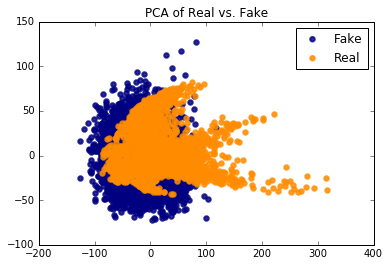

In [63]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_pca = np.concatenate((gen_X_train, X_train))
print(X_pca.shape)

y = np.array([1] * generate_count + [0] * training_size)
pca = PCA(n_components=2)
X_r = pca.fit(X_pca).transform(X_pca)

target_names = ['Fake', 'Real']
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('PCA of Real vs. Fake')

print(pca.explained_variance_ratio_)

(1000, 36)


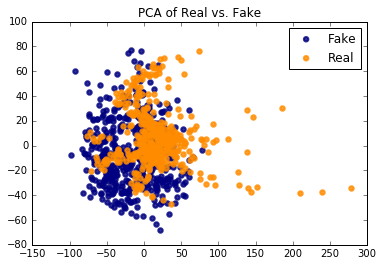

In [64]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plot_count = 500
X_pca = np.concatenate((gen_X_train[:plot_count], X_train[:plot_count]))
print(X_pca.shape)

y = np.array([1] * plot_count + [0] * plot_count)

pca = PCA(n_components=2)
X_r = pca.fit(X_pca).transform(X_pca)

target_names = ['Fake', 'Real']
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('PCA of Real vs. Fake')

# Real vs. Fake

In [65]:
clf =  RandomForestClassifier()

X_comb = np.concatenate((gen_X_train, X_train))
y = np.array([1] * generate_count + [0] * training_size)

print(X_comb.shape, y.shape)
scores = cross_val_score(clf, X_comb, y, cv=5)
print(scores)

from sklearn.neighbors import KNeighborsClassifier
nn_clf = KNeighborsClassifier(n_neighbors=9)

scores = cross_val_score(nn_clf, X_comb, y, cv=5)
print(scores)

((12000, 36), (12000,))
[ 0.97583333  0.97708333  0.97916667  0.98166667  0.9775    ]
[ 0.90166667  0.9         0.89708333  0.89083333  0.89791667]
